# 배운거 위치 복습

In [ ]:
##배운거 위치 복습 

데이터 다루는 도구들 
1. Numpy - 배열, 선형대수/ 수학적 분석 
2. Pandas - dataframe, 시리즈/ 데이터 자체를 파악 

데이터 타입들 
- 정형
- 반정형 
- 비정형

데이터 수집 
- 웹 크롤링 

# EDA 목적과 순서

In [ ]:
#EDA (Exploratory Data Analysis) : 탐색적 데이터분석
- 탐색적 자료 분석
- 데이터분석 이전에 그래프나 통게적인 분석을 통해서 데이터 직관적으로 파악
- 데이터자체가 가지고 있는 그대로의 의미를 파악하기 위함 

- 목적: 
 * 데이터 수집 how에 대한 의사결정
 * 데이터에 맞는 모델 선정 
 * 변수들 간 관계파악 

- 순서:
 * 데이터 가져오기(모듈 세팅)
 * 데이터 정보확인 
 * 데이터 전처리 (결측치, 이상치..)
 * 데이터시각화 

### outlier.xlsx 성적 데이터

#### 1번. 데이터 가져오기 (모듈세팅)

In [1]:
import pandas as pd

In [75]:
out_df = pd.read_excel('outlier.xlsx')
out_df   # -> 번호가 인덱스가 되면 괜찮을듯?

,번호,국어,수학,영어
0,1,32,80,100
1,2,50,100,90
2,3,810,100,78
3,4,80,120,21
4,5,88,67,29
5,6,70,50,69
6,7,68,24,34
7,8,90,97,39
8,9,-57,48,67
9,10,100,87,93


#### 2번. 정보확인 

In [4]:
out_df.head()
out_df.tail()

,번호,국어,수학,영어
5,6,70,50,69
6,7,68,24,34
7,8,90,97,39
8,9,-57,48,67
9,10,100,87,93


In [5]:
out_df.describe()

,번호,국어,수학,영어
count,10.00000,10.000000,10.000000,10.00000
mean,5.50000,133.100000,77.300000,62.00000
std,3.02765,242.093852,29.616249,29.06315
min,1.00000,-57.000000,24.000000,21.00000
25%,3.25000,54.500000,54.250000,35.25000
50%,5.50000,75.000000,83.500000,68.00000
75%,7.75000,89.500000,99.250000,87.00000
max,10.00000,810.000000,120.000000,100.00000


In [7]:
out_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   번호      10 non-null     int64
 1   국어      10 non-null     int64
 2   수학      10 non-null     int64
 3   영어      10 non-null     int64
dtypes: int64(4)
memory usage: 448.0 bytes


In [76]:
#따라서 인덱스로 - set_index

out_df = out_df.set_index('번호')  #번호를 인덱스로 사용하겠다   #할당까지 

In [11]:
out_df       #원래 데이터 꼭 다시 확인!!

,국어,수학,영어
번호,,,
1,32,80,100
2,50,100,90
3,810,100,78
4,80,120,21
5,88,67,29
6,70,50,69
7,68,24,34
8,90,97,39
9,-57,48,67


In [77]:
#점수인데 800점대나 -값 있 -> 우리가 값 바꿔줄 수 있 
out_df['국어'] = out_df['국어'].replace(-57,57)
out_df

,국어,수학,영어
번호,,,
1,32,80,100
2,50,100,90
3,810,100,78
4,80,120,21
5,88,67,29
6,70,50,69
7,68,24,34
8,90,97,39
9,57,48,67


In [81]:
#1반 학생들의 과목별 성적 평균
out_df.describe()  #or
out_df.mean()

국어    71.6
수학    77.3
영어    62.0
dtype: float64

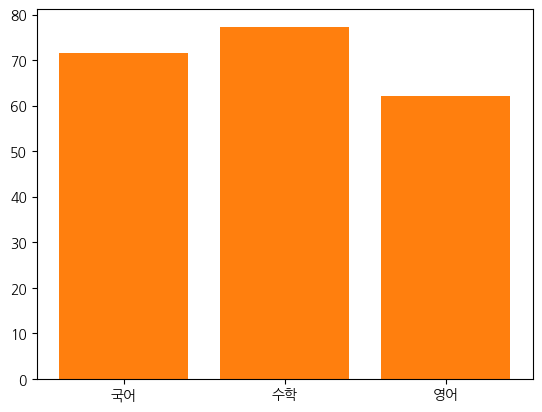

In [94]:
#bar 그래프(x,y)
#plt.bar(['국어', '수학','영어'],out_df.mean())
plt.bar(out_df.mean().index, out_df.mean())
plt.bar(out_df.columns, out_df.mean())
plt.show()

In [86]:
#과목별 최대 최솟값
print(out_df.min())
print(out_df.max())

국어    32
수학    24
영어    21
dtype: int64
국어    100
수학    120
영어    100
dtype: int64


In [87]:
#q1,q2,q3
q1 = out_df.quantile(0.25)
q2 = out_df.quantile(0.5)
q3 = out_df.quantile(0.75)

print(q1)
print(q2)
print(q3)

국어    59.75
수학    54.25
영어    35.25
Name: 0.25, dtype: float64
국어    75.0
수학    83.5
영어    68.0
Name: 0.5, dtype: float64
국어    86.25
수학    99.25
영어    87.00
Name: 0.75, dtype: float64


In [88]:
#IQR = q3-q1
IQR = q3 - q1
#IQR
#+- IQR*1.5 가 일반적인 데이터허용범위 

국어    26.50
수학    45.00
영어    51.75
dtype: float64

#### 3번. 전처리 - 이상치 확인
* 이상치(outlier): 사분위에서 특정 범위(+-IQR*1.5)를 초과하는 경우  

In [ ]:
#사분위수 - 100% 4개로 나누면 25%씩
Q1 25%
Q2 50%
Q3 75%

Q3-Q1 IQR(interquartile range) :전체 값의 50%

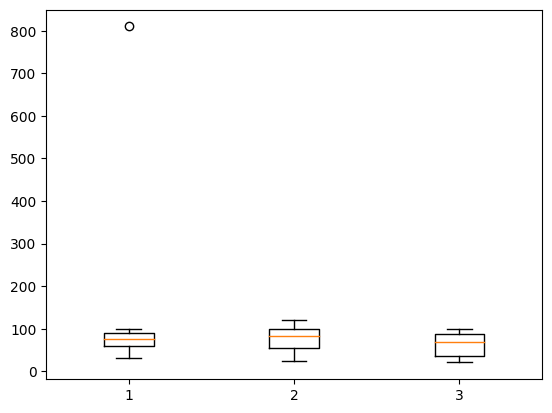

In [15]:
## 이상치 확인 -> boxplot : 알아서 사분위값 계산해서 시각적으로 보여줌  
import matplotlib.pyplot as plt

plt.boxplot(out_df)
plt.show()

In [78]:
#이상치 바꿔보면 
out_df['국어'] = out_df['국어'].replace(810, 81)
out_df

,국어,수학,영어
번호,,,
1,32,80,100
2,50,100,90
3,81,100,78
4,80,120,21
5,88,67,29
6,70,50,69
7,68,24,34
8,90,97,39
9,57,48,67


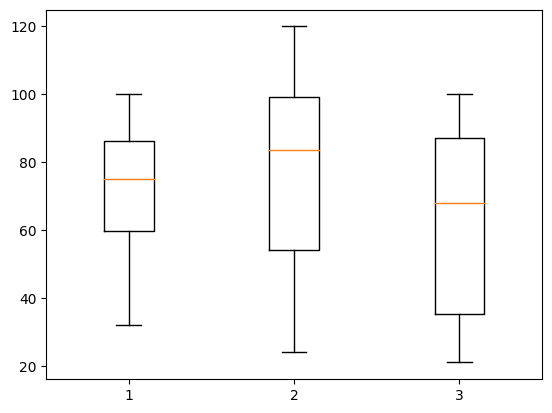

In [17]:
plt.boxplot(out_df)
plt.show()

## weather 데이터

#### 1번. 데이터 불러오기 

In [1]:
import pandas as pd

In [2]:
weather_df = pd.read_csv('weather.csv',encoding='cp949')        ##
weather_df.head()

,일시,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
0,2010.1.1,-1.7,5.0,0.0,13.3,3.4,334.7
1,2010.1.2,-0.4,13.2,0.0,17.0,5.1,14.1
2,2010.1.3,-0.1,7.5,0.0,14.5,5.4,5.5
3,2010.1.4,1.0,11.5,1.0,22.4,5.2,340.2
4,2010.1.5,-2.1,1.7,0.0,19.1,7.1,11.3


#### 2번. 정보확인 

In [22]:
weather_df.info()   #not-null count기 때문에 null값이 있는거! 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   일시                 365 non-null    object 
 1   최저기온(°C)           359 non-null    float64
 2   최고기온(°C)           359 non-null    float64
 3   일강수량(mm)           359 non-null    float64
 4   최대 순간 풍속(m/s)      359 non-null    float64
 5   평균 풍속(m/s)         357 non-null    float64
 6   최대 순간 풍속 풍향(hhmi)  359 non-null    float64
dtypes: float64(6), object(1)
memory usage: 20.1+ KB


In [26]:
weather_df.describe()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
count,359.000000,359.000000,359.000000,359.000000,357.000000,359.000000
mean,10.023677,17.618384,8.679666,12.179944,4.378151,186.905571
std,8.804447,8.415890,22.873447,5.276340,1.627493,119.173462
min,-5.300000,-1.400000,0.000000,4.300000,1.400000,0.000000
25%,1.950000,11.400000,0.000000,7.950000,3.200000,61.900000
50%,9.500000,17.500000,0.000000,11.000000,4.100000,202.500000
75%,17.200000,25.000000,4.250000,14.950000,5.400000,320.600000
max,25.700000,34.000000,166.500000,32.900000,10.000000,357.200000


In [3]:
weather_df = weather_df.set_index('일시')
weather_df 

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010.1.1,-1.7,5.0,0.0,13.3,3.4,334.7
2010.1.2,-0.4,13.2,0.0,17.0,5.1,14.1
2010.1.3,-0.1,7.5,0.0,14.5,5.4,5.5
2010.1.4,1.0,11.5,1.0,22.4,5.2,340.2
2010.1.5,-2.1,1.7,0.0,19.1,7.1,11.3
...,...,...,...,...,...,...
2010.12.27,-0.1,6.7,0.0,20.3,3.8,284.1
2010.12.28,1.0,8.8,0.0,15.5,5.2,227.8
2010.12.29,-0.5,5.9,0.5,19.1,4.4,323.3


In [4]:
#pd.to_datetime -> 좀더 편하게 이용할 수 있음 
weather_df.index = pd.to_datetime(weather_df.index, format = '%Y-%m-%d')
weather_df.head()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-01-01,-1.7,5.0,0.0,13.3,3.4,334.7
2010-01-02,-0.4,13.2,0.0,17.0,5.1,14.1
2010-01-03,-0.1,7.5,0.0,14.5,5.4,5.5
2010-01-04,1.0,11.5,1.0,22.4,5.2,340.2
2010-01-05,-2.1,1.7,0.0,19.1,7.1,11.3


In [34]:
weather_df.info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2010-01-01 to 2010-12-31
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   최저기온(°C)           359 non-null    float64
 1   최고기온(°C)           359 non-null    float64
 2   일강수량(mm)           359 non-null    float64
 3   최대 순간 풍속(m/s)      359 non-null    float64
 4   평균 풍속(m/s)         357 non-null    float64
 5   최대 순간 풍속 풍향(hhmi)  359 non-null    float64
dtypes: float64(6)
memory usage: 20.0 KB


#### 3번. 전처리 - 결측치 확인 

In [29]:
# 결측치 컬럼별 개수 확인
weather_df.isna().sum()

최저기온(°C)             6
최고기온(°C)             6
일강수량(mm)             6
최대 순간 풍속(m/s)        6
평균 풍속(m/s)           8
최대 순간 풍속 풍향(hhmi)    6
dtype: int64

In [31]:
# boolean -> Boolean indexing
# 앞에 원하는 값 붙여주면 /null값 확인하고 -> 최저기온의 어느 날짜가 비어있는지 알 수 있 
weather_df['최저기온(°C)'][weather_df['최저기온(°C)'].isna()]

일시
2010.12.8    NaN
2010.12.9    NaN
2010.12.10   NaN
2010.12.11   NaN
2010.12.12   NaN
2010.12.13   NaN
Name: 최저기온(°C), dtype: float64

In [35]:
weather_df['최저기온(°C)'][weather_df['최저기온(°C)'].isna()]

일시
2010-12-08   NaN
2010-12-09   NaN
2010-12-10   NaN
2010-12-11   NaN
2010-12-12   NaN
2010-12-13   NaN
Name: 최저기온(°C), dtype: float64

In [36]:
weather_df['최고기온(°C)'][weather_df['최고기온(°C)'].isna()]

일시
2010-12-08   NaN
2010-12-09   NaN
2010-12-10   NaN
2010-12-11   NaN
2010-12-12   NaN
2010-12-13   NaN
Name: 최고기온(°C), dtype: float64

In [37]:
weather_df['일강수량(mm)'][weather_df['일강수량(mm)'].isna()]

일시
2010-12-08   NaN
2010-12-09   NaN
2010-12-10   NaN
2010-12-11   NaN
2010-12-12   NaN
2010-12-13   NaN
Name: 일강수량(mm), dtype: float64

In [38]:
weather_df['최대 순간 풍속(m/s)'][weather_df['최대 순간 풍속(m/s)'].isna()]

일시
2010-12-08   NaN
2010-12-09   NaN
2010-12-10   NaN
2010-12-11   NaN
2010-12-12   NaN
2010-12-13   NaN
Name: 최대 순간 풍속(m/s), dtype: float64

In [39]:
weather_df['평균 풍속(m/s)'][weather_df['평균 풍속(m/s)'].isna()]

일시
2010-12-07   NaN
2010-12-08   NaN
2010-12-09   NaN
2010-12-10   NaN
2010-12-11   NaN
2010-12-12   NaN
2010-12-13   NaN
2010-12-14   NaN
Name: 평균 풍속(m/s), dtype: float64

In [40]:
weather_df['최대 순간 풍속 풍향(hhmi)'][weather_df['최대 순간 풍속 풍향(hhmi)'].isna()]

일시
2010-12-08   NaN
2010-12-09   NaN
2010-12-10   NaN
2010-12-11   NaN
2010-12-12   NaN
2010-12-13   NaN
Name: 최대 순간 풍속 풍향(hhmi), dtype: float64

In [ ]:
#대부분 : 12월 8-13일
#평균풍속만 :12월 7-14일 

In [42]:
## 날짜로 결측값 위치 확인 

#날짜(인덱스) 12월에 결측치 
#인덱스를 레이블로 설정했을때 쉽게 찾 -> loc (앞뒤포함)
weather_df.loc['2010-12-07':'2010-12-14']

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-12-07,0.4,2.0,0.0,20.6,NaN,340.2
2010-12-08,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-09,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-10,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-11,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-12,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-13,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-14,-0.8,2.9,0.0,26.7,NaN,300.8


#### 3-1번. 결측치 처리 
* 경향에 맞춰서 데이터 넣어줘야함 
* 시계열이므로 비어있는 값 앞뒤값을 확인해줌 

In [5]:
#따라서 12월 데이터를 확인해봄 
#시계열 -> 비어있는 값 앞뒤값을 확인해줌    
weather_df.loc['2010-12-01':'2010-12-31'] 

#최저기온 - 떨어지다가 결측치 지나고 음수되니까 중간에 떨어지고 있었음을 알 수 있 
#최고기온 - 떨어질듯 
#일강수량 - 계속 0인듯 

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-12-01,6.2,16.4,0.0,6.3,3.1,25.2
2010-12-02,6.2,12.2,7.5,9.4,3.9,14.1
2010-12-03,2.0,11.4,0.0,18.4,5.2,50.5
2010-12-04,-0.5,11.3,0.0,8.3,2.9,39.4
2010-12-05,2.8,13.8,0.0,8.4,3.1,165.8
2010-12-06,1.6,13.1,0.0,24.6,8.6,14.1
2010-12-07,0.4,2.0,0.0,20.6,NaN,340.2
2010-12-08,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-09,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#일강수량의 결측치를 0으로 채워주기 - fillna  
weather_df['일강수량(mm)'] = weather_df['일강수량(mm)'].fillna(0)          #할당까지! 
#weather_df['일강수량(mm)']
weather_df['일강수량(mm)'].isna().sum()                                    #값 채워졌는지 확인 

0

In [ ]:
#최저,최고기온 4분위 - 중간값으로 채우는 방법 
#계속 떨어지는 것으로 나열되어 있기때문에 그 중간값으로 채워보쟈! 

weather_df.describe()  #이건 전체경향 

In [7]:
weather_df.loc['2010-12-05':'2010-12-15'].describe()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
count,5.000000,5.000000,11.0,5.000000,3.000000,5.000000
mean,0.220000,6.760000,0.0,20.960000,6.400000,227.720000
std,2.200454,6.123153,0.0,7.358872,2.910326,137.437648
min,-2.900000,2.000000,0.0,8.400000,3.100000,14.100000
25%,-0.800000,2.000000,0.0,20.600000,5.300000,165.800000
50%,0.400000,2.900000,0.0,24.500000,7.500000,300.800000
75%,1.600000,13.100000,0.0,24.600000,8.050000,317.700000
max,2.800000,13.800000,0.0,26.700000,8.600000,340.200000


In [149]:
weather_df['최저기온(°C)'] = weather_df['최저기온(°C)'].fillna(0.4)  
weather_df['최고기온(°C)'] = weather_df['최고기온(°C)'].fillna(2.9)  

In [ ]:
#나머지 3개 레이블은 - 왔다갔다 하는 경향 
-> 따라서 짧게 짧게 끊어서 4분위수 채워넣는 방식  or
-> 또는 6일부터 15일까지 평균값 채워넣는 방식  
#최대순간풍속- 4일부터 14일까지만 보면 올라가는 경향 

In [55]:
weather_df.loc['2010-12-06':'2010-12-15'].describe()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
count,10.000000,10.000000,10.0,4.000000,2.000000,4.000000
mean,0.070000,3.740000,0.0,24.100000,8.050000,243.200000
std,1.187013,3.309985,0.0,2.544275,0.777817,153.583658
min,-2.900000,2.000000,0.0,20.600000,7.500000,14.100000
25%,0.400000,2.900000,0.0,23.525000,7.775000,229.125000
50%,0.400000,2.900000,0.0,24.550000,8.050000,309.250000
75%,0.400000,2.900000,0.0,25.125000,8.325000,323.325000
max,1.600000,13.100000,0.0,26.700000,8.600000,340.200000


In [9]:
#최대순간평균을 6-15일까지의 평균값으로 채워줌 
weather_df['최대 순간 풍속(m/s)'] = weather_df['최대 순간 풍속(m/s)'].fillna(24.1)  
weather_df['최대 순간 풍속(m/s)'].isna().sum()

0

In [151]:
#평균풍속의 12월4-18일까지 결측치 확인 -> 평균값 구하고 -> 채워주기 
weather_df.loc['2010-12-04':'2010-12-18'].describe()
weather_df['평균 풍속(m/s)'] = weather_df['평균 풍속(m/s)'].fillna(4.642857)

In [11]:
weather_df['평균 풍속(m/s)'].isna().sum()  #확인 

0

In [152]:
#최대순간 풍속풍향의 7-17일까지의 평균으로 채워줌 - 왜냐면 (계절마다 방향) 경향 비슷하겠지 생각 
weather_df.loc['2010-12-07':'2010-12-17'].describe()
weather_df['최대 순간 풍속 풍향(hhmi)'] = weather_df['최대 순간 풍속 풍향(hhmi)'].fillna(305.380000)

weather_df['평균 풍속(m/s)'].isna().sum()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi),월
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0
mean,-0.481818,2.972727,0.454545,22.000000,4.694805,305.380000,12.0
std,1.389114,1.475189,1.507557,4.775353,1.037585,15.135614,0.0
min,-3.200000,1.300000,0.000000,11.800000,3.400000,284.100000,12.0
25%,-1.000000,2.450000,0.000000,22.350000,4.642857,303.090000,12.0
50%,0.400000,2.900000,0.000000,24.100000,4.642857,305.380000,12.0
75%,0.400000,2.900000,0.000000,24.100000,4.642857,305.380000,12.0
max,0.400000,7.100000,5.000000,26.700000,7.500000,340.200000,12.0


In [ ]:
weather_df.loc['2010-12-01':'2010-12-31']  #비어있는 값 다 채움 

#### 4번. 시각화

In [19]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2010-01-01 to 2010-12-31
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   최저기온(°C)           365 non-null    float64
 1   최고기온(°C)           365 non-null    float64
 2   일강수량(mm)           365 non-null    float64
 3   최대 순간 풍속(m/s)      365 non-null    float64
 4   평균 풍속(m/s)         365 non-null    float64
 5   최대 순간 풍속 풍향(hhmi)  365 non-null    float64
dtypes: float64(6)
memory usage: 28.1 KB


In [16]:
#matplotlib사용시 한글출력을 위한 추가 라이브러리
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 46.7 MB/s eta 0:00:00


In [18]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [22]:
x = weather_df.index              #시간순서
y1 = weather_df['최저기온(°C)']

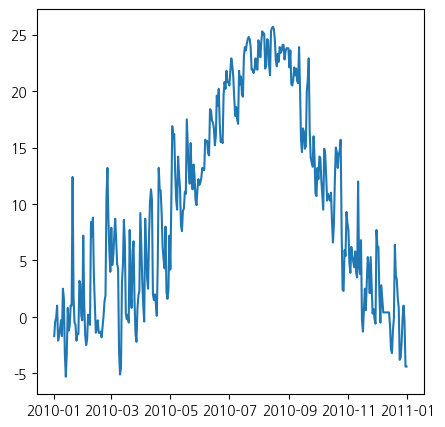

In [24]:
#하나의 셀 안에 어떻게 출력할 것인지 정하면 됨 
plt.figure(figsize=(5,5))    #그래프 사이즈 
plt.plot(x,y1)               #그래프 그리기
plt.show()                   #그래프 출력 

In [25]:
#그래프 변수지정 
y2 = weather_df['최고기온(°C)']
y3 = weather_df['일강수량(mm)']
y4 = weather_df['최대 순간 풍속(m/s)']
y5 = weather_df['평균 풍속(m/s)']
y6 = weather_df['최대 순간 풍속 풍향(hhmi)']

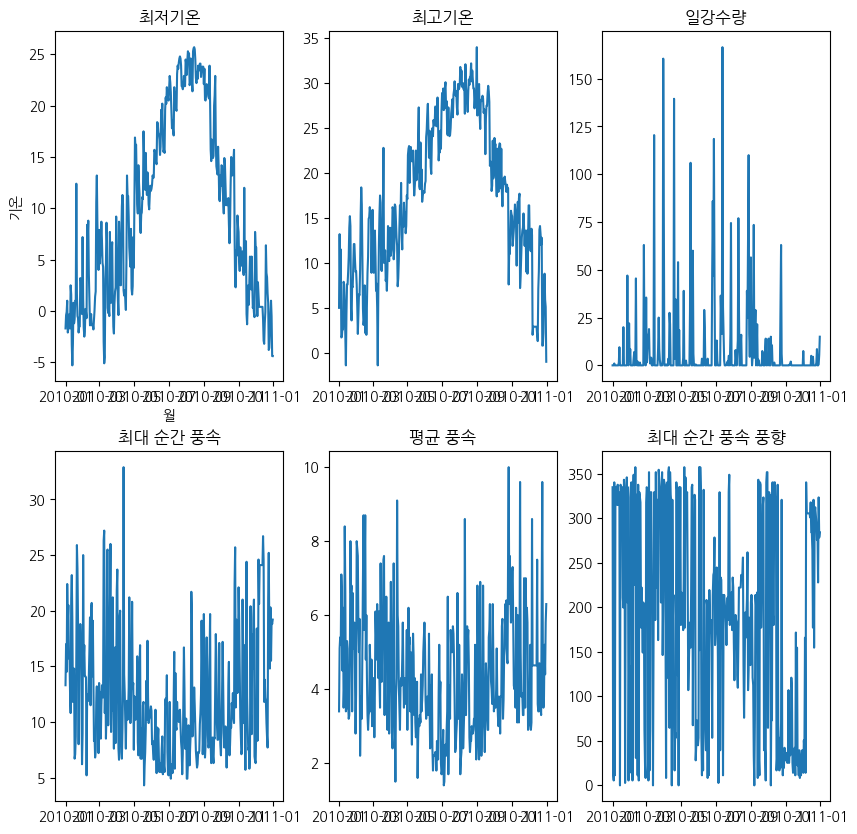

In [32]:
plt.figure(figsize=(10,10))    

##한 화면에 여러plot -> subplots
#plt.subplot(행,열, 인덱스)
plt.subplot(2,3,1)     #2x3행렬에 첫번째에 들어감 
plt.plot(x,y1)
plt.title('최저기온')  #전체제목
plt.xlabel('월')       #x축 제목
plt.ylabel('기온')     #y축 제목 

plt.subplot(2,3,2) 
plt.plot(x,y2)
plt.title('최고기온')

plt.subplot(2,3,3) 
plt.plot(x,y3)
plt.title('일강수량')

plt.subplot(2,3,4) 
plt.plot(x,y4)
plt.title('최대 순간 풍속')

plt.subplot(2,3,5) 
plt.plot(x,y5)
plt.title('평균 풍속')

plt.subplot(2,3,6) 
plt.plot(x,y6)
plt.title('최대 순간 풍속 풍향')

plt.show() 

In [ ]:
# 월별로 데이터 나누고 싶다면? -> groupby
#groupby : 기본데이터 -> 처리할 수치 데이터 골라줌 
#월별+ 기온, 풍속...

In [34]:
weather_df.index   #값 자체가 아니라 datetime이라는 index값임 

DatetimeIndex(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04',
               '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-09', '2010-01-10',
               ...
               '2010-12-22', '2010-12-23', '2010-12-24', '2010-12-25',
               '2010-12-26', '2010-12-27', '2010-12-28', '2010-12-29',
               '2010-12-30', '2010-12-31'],
              dtype='datetime64[ns]', name='일시', length=365, freq=None)

In [35]:
#따라서 시리즈로 바꿔줌 
weather_date = pd.Series(weather_df.index)  
weather_date

0     2010-01-01
1     2010-01-02
2     2010-01-03
3     2010-01-04
4     2010-01-05
         ...    
360   2010-12-27
361   2010-12-28
362   2010-12-29
363   2010-12-30
364   2010-12-31
Name: 일시, Length: 365, dtype: datetime64[ns]

In [37]:
#그럼 이제 .dt 하고 사용할 수 있음 
#원래 데이터에 새로운 열 만들어줌 
weather_df['월'] = weather_date.dt.month.values     #그냥 이렇게 넣으면 index값이 달라서 값 안들어감
                                                    #따라서 .values로 값만 뽑아서 넣음 
weather_df

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi),월
일시,,,,,,,
2010-01-01,-1.7,5.0,0.0,13.3,3.4,334.7,1
2010-01-02,-0.4,13.2,0.0,17.0,5.1,14.1,1
2010-01-03,-0.1,7.5,0.0,14.5,5.4,5.5,1
2010-01-04,1.0,11.5,1.0,22.4,5.2,340.2,1
2010-01-05,-2.1,1.7,0.0,19.1,7.1,11.3,1
...,...,...,...,...,...,...,...
2010-12-27,-0.1,6.7,0.0,20.3,3.8,284.1,12
2010-12-28,1.0,8.8,0.0,15.5,5.2,227.8,12
2010-12-29,-0.5,5.9,0.5,19.1,4.4,323.3,12


In [52]:
##준비가 다 됨 

#이제 groupby
##.groupby(기준 데이터)[특정 coulumn].함수!!

month_low_temp = weather_df.groupby(weather_df['월'])['최저기온(°C)'].mean()  #그냥 하면 월별데이터 #월 ==1이면 1월데이터

In [48]:
#최고기온, 일강수량, 최대순간풍속, 평균풍속, 최대순간 풍속풍향의 월별 평균    #할당까지!!! 
month_high_temp = weather_df.groupby(weather_df['월'])['최고기온(°C)'].mean() 
month_daily_vol = weather_df.groupby(weather_df['월'])['일강수량(mm)'].mean() 
month_wind_speed = weather_df.groupby(weather_df['월'])['최대 순간 풍속(m/s)'].mean() 
month_wind_mean = weather_df.groupby(weather_df['월'])['평균 풍속(m/s)'].mean() 
month_wind_dic = weather_df.groupby(weather_df['월'])['최대 순간 풍속 풍향(hhmi)'].mean() 

In [ ]:
# x_month = weather_df['월']
x_month = weather_df['월'].unique()
#x_month

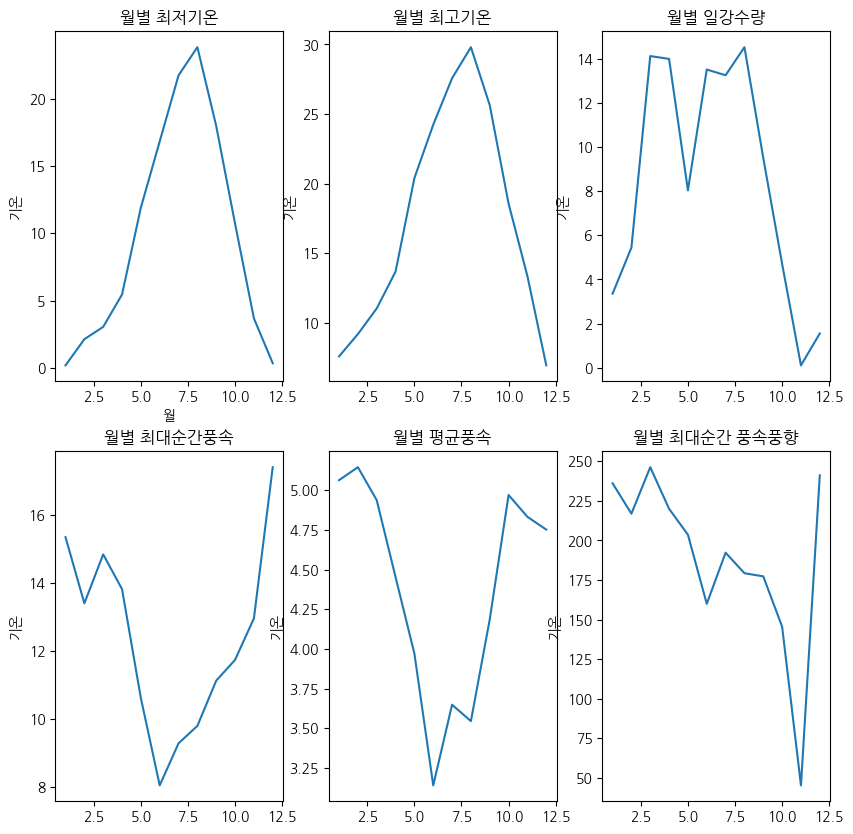

In [156]:
#그룹바이 데이터 -> 1월 데이터들 그래프 -> subplot
plt.figure(figsize=(10,10))

plt.subplot(2,3,1)
plt.title('월별 최저기온')
plt.ylabel('기온')
plt.xlabel('월')
plt.plot(x_month, month_low_temp)      

plt.subplot(2,3,2)
plt.title('월별 최고기온')    #최저와 최고기온은 경향성 비슷 
plt.ylabel('기온')
plt.plot(x_month, month_high_temp)

plt.subplot(2,3,3)
plt.title('월별 일강수량')
plt.ylabel('기온')
plt.plot(x_month, month_daily_vol)

plt.subplot(2,3,4)
plt.title('월별 최대순간풍속')
plt.ylabel('기온')
plt.plot(x_month, month_wind_speed)

plt.subplot(2,3,5)
plt.title('월별 평균풍속')
plt.ylabel('기온')
plt.plot(x_month, month_wind_mean)

plt.subplot(2,3,6)
plt.title('월별 최대순간 풍속풍향')
plt.ylabel('기온')
plt.plot(x_month, month_wind_dic)

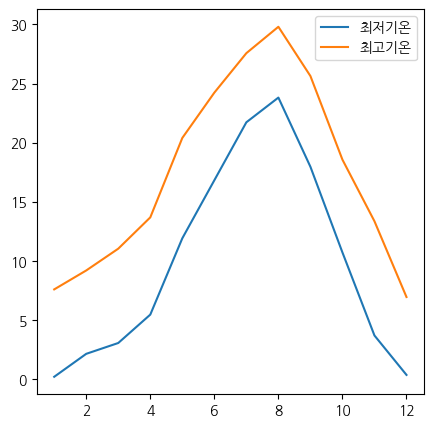

In [64]:
# 기온 그래프를 하나의 그래프로 표시 - 경향성 비슷했으니까 

plt.figure(figsize=(5, 5))

plt.plot(x_month, month_low_temp, label="최저기온")
plt.plot(x_month, month_high_temp, label="최고기온")
# 색상: b: blue, r: red, y: yellow, w: white ... 
# 선: --: dash line, -.: dash dot, : - dot ... # 링크 남기기

plt.legend(loc="upper right")
# 범례위치 : upper left, upper center, upper right, lower(left, right)
plt.show()

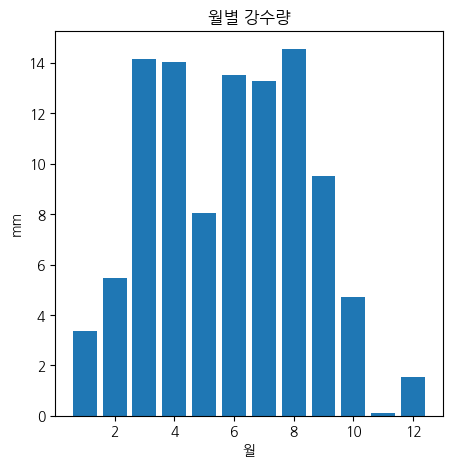

In [66]:
#강수량은 바 그래프로 그려보기 - 연속형 수치보다< 양을 나타내는 것이어서 

plt.figure(figsize=(5, 5))
plt.bar(x_month, month_daily_vol)
plt.title('월별 강수량')
plt.xlabel('월')
plt.ylabel('mm')

plt.show()

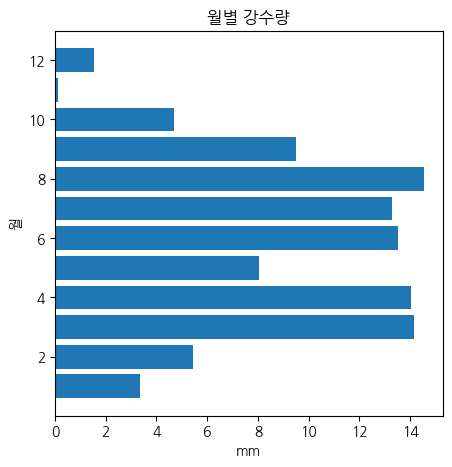

In [67]:
#옆으로 있는 막대그래프 - plt.barh에다가 
plt.figure(figsize=(5, 5))
plt.barh(x_month, month_daily_vol)
plt.title('월별 강수량')
plt.xlabel('mm')
plt.ylabel('월')                      # 레이블만 바꿔줌 

plt.show()

In [ ]:
## 1월 데이터만 뽑는 방법? 
#인덱스 -> 월 -> 1 -> 1월 데이터만 뽑아온다 -> 31개의 데이터(1일-31일)
#하지만 나머지달과 비교하려는 것 아님 (비교가 아니라 조건) -> 따라서 groupby 사용할 이유없음  

In [69]:
#1월 데이터 
month_1 = weather_df[weather_df['월'] == 1]
month_1.head()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi),월
일시,,,,,,,
2010-01-01,-1.7,5.0,0.0,13.3,3.4,334.7,1
2010-01-02,-0.4,13.2,0.0,17.0,5.1,14.1,1
2010-01-03,-0.1,7.5,0.0,14.5,5.4,5.5,1
2010-01-04,1.0,11.5,1.0,22.4,5.2,340.2,1
2010-01-05,-2.1,1.7,0.0,19.1,7.1,11.3,1


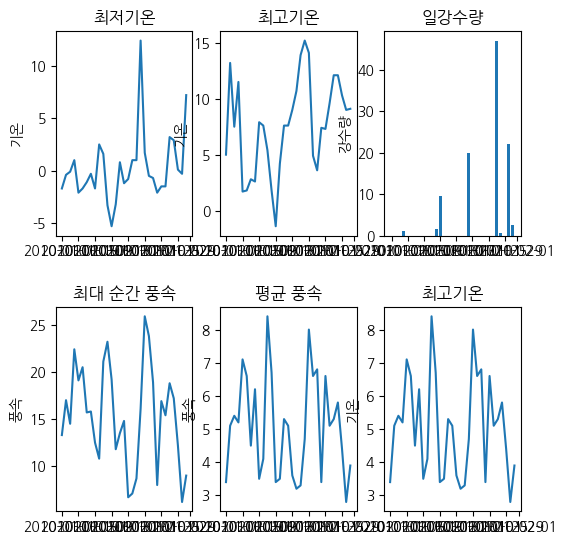

In [74]:
#1월 데이터를 subplot 이용해 2x3 으로 그려주세요. 강수량은 bar그래프로
#그룹바이 데이터 -> 1월 데이터들 그래프 -> subplot

plt.figure(figsize=(6,6))
# subplots 간의 간격 조절
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)

# 1
plt.subplot(2, 3, 1)
plt.title('최저기온')
plt.ylabel('기온')
plt.plot(month_1['최저기온(°C)'])

# 2
plt.subplot(2, 3, 2)
plt.title('최고기온')
plt.ylabel('기온')
plt.plot(month_1['최고기온(°C)'])

# 3
plt.subplot(2, 3, 3)
plt.title('일강수량')
plt.ylabel('강수량')
plt.bar(month_1.index, month_1['일강수량(mm)'])

# 4
plt.subplot(2, 3, 4)
plt.title('최대 순간 풍속')
plt.ylabel('풍속')
plt.plot(month_1['최대 순간 풍속(m/s)'])

# 5
plt.subplot(2, 3, 5)
plt.title('평균 풍속')
plt.ylabel('풍속')
plt.plot(month_1['평균 풍속(m/s)'])

# 6
plt.subplot(2, 3, 6)
plt.title('최고기온')
plt.ylabel('기온')
plt.plot(month_1['평균 풍속(m/s)'])


plt.show()

## jeju_food.xlsx 제주도 음식점 데이터 
* 한국 관광 데이터 랩에서 가져옴 
https://datalab.visitkorea.or.kr/datalab/portal/main/getMainForm.do

### 1번. 데이터 가져오기

In [5]:
import pandas as pd

In [7]:
food = pd.read_excel('jeju_food.xlsx')
food

food.head()
food.tail()

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
495,496,아라파파,제주특별자치도,제주시,제주 제주시 북촌15길 60-0,음식,간이음식,3559
496,497,애월연어,제주특별자치도,제주시,제주 제주시 하소로 660-0,음식,전문음식,3556
497,498,춘미향식당,제주특별자치도,서귀포시,제주 서귀포시 산방로 378-0,음식,한식,3552
498,499,서울앵무새제주점,제주특별자치도,서귀포시,제주 서귀포시 색달중앙로 162-0,음식,카페/찻집,3551
499,500,오후새우시,제주특별자치도,서귀포시,제주 서귀포시 천제연로 184-0,음식,한식,3542


### 2번. 정보확인

In [101]:
food.info()    #결측치 없 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   순위        500 non-null    int64 
 1   관광지명      500 non-null    object
 2   광역시/도     500 non-null    object
 3   시/군/구     500 non-null    object
 4   도로명주소     500 non-null    object
 5   중분류 카테고리  500 non-null    object
 6   소분류 카테고리  500 non-null    object
 7   검색건수      500 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [102]:
food.describe()

,순위,검색건수
count,500.000000,500.000000
mean,250.468000,8898.482000
std,144.454807,9624.024732
min,1.000000,3542.000000
25%,125.750000,4340.750000
50%,250.500000,5694.500000
75%,375.250000,9107.250000
max,500.000000,108360.000000


### 3번. 전처리

In [103]:
food.isna().sum()   #결측치 확인 

순위          0
관광지명        0
광역시/도       0
시/군/구       0
도로명주소       0
중분류 카테고리    0
소분류 카테고리    0
검색건수        0
dtype: int64

In [9]:
#광역시/도 컬럼 삭제 - 중복되는 값 제거 

food = food.drop('광역시/도', axis=1)  #열 제거 
food 

,순위,관광지명,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
0,1,우진해장국,제주시,제주 제주시 서사로 11-0,음식,한식,108360
1,2,오는정김밥,서귀포시,제주 서귀포시 동문동로 2-0,음식,간이음식,71762
2,3,카페노티드제주,제주시,제주 제주시 애월로1길 24-9,음식,카페/찻집,70229
3,4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,음식,한식,66310
4,5,원앤온리,서귀포시,제주 서귀포시 산방로 141-0,음식,카페/찻집,61219
...,...,...,...,...,...,...,...
495,496,아라파파,제주시,제주 제주시 북촌15길 60-0,음식,간이음식,3559
496,497,애월연어,제주시,제주 제주시 하소로 660-0,음식,전문음식,3556
497,498,춘미향식당,서귀포시,제주 서귀포시 산방로 378-0,음식,한식,3552
498,499,서울앵무새제주점,서귀포시,제주 서귀포시 색달중앙로 162-0,음식,카페/찻집,3551


In [10]:
#중분류 다른 값도 있는지 확인 - unique
food['중분류 카테고리'].unique()       #따라서 날려도 될듯 

array(['음식'], dtype=object)

In [11]:
food = food.drop('중분류 카테고리', axis = 1)
food

,순위,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
0,1,우진해장국,제주시,제주 제주시 서사로 11-0,한식,108360
1,2,오는정김밥,서귀포시,제주 서귀포시 동문동로 2-0,간이음식,71762
2,3,카페노티드제주,제주시,제주 제주시 애월로1길 24-9,카페/찻집,70229
3,4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,한식,66310
4,5,원앤온리,서귀포시,제주 서귀포시 산방로 141-0,카페/찻집,61219
...,...,...,...,...,...,...
495,496,아라파파,제주시,제주 제주시 북촌15길 60-0,간이음식,3559
496,497,애월연어,제주시,제주 제주시 하소로 660-0,전문음식,3556
497,498,춘미향식당,서귀포시,제주 서귀포시 산방로 378-0,한식,3552
498,499,서울앵무새제주점,서귀포시,제주 서귀포시 색달중앙로 162-0,카페/찻집,3551


In [12]:
#유일값들 각 개수 - value_counts()

food['소분류 카테고리'].value_counts()
#food['소분류 카테고리'].unique()

한식       210
카페/찻집    152
전문음식      74
간이음식      49
외국식       12
음식점기타      3
Name: 소분류 카테고리, dtype: int64

In [113]:
food['시/군/구'].unique()      #제주시와 서귀포시로 나눠지는 것 알 수 있 

array(['제주시', '서귀포시'], dtype=object)

In [112]:
food['시/군/구'].value_counts()   #인기많은(검색이 많이된) 식당은 제주시가 서귀포시보다 더 많다. 도출

제주시     309
서귀포시    191
Name: 시/군/구, dtype: int64

In [13]:
#내부 칼럼을 인덱스로 -set_index
food = food.set_index('순위')
food

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
1,우진해장국,제주시,제주 제주시 서사로 11-0,한식,108360
2,오는정김밥,서귀포시,제주 서귀포시 동문동로 2-0,간이음식,71762
3,카페노티드제주,제주시,제주 제주시 애월로1길 24-9,카페/찻집,70229
4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,한식,66310
5,원앤온리,서귀포시,제주 서귀포시 산방로 141-0,카페/찻집,61219
...,...,...,...,...,...
496,아라파파,제주시,제주 제주시 북촌15길 60-0,간이음식,3559
497,애월연어,제주시,제주 제주시 하소로 660-0,전문음식,3556
498,춘미향식당,서귀포시,제주 서귀포시 산방로 378-0,한식,3552


In [118]:
## 소분류 카테고리가 한식인거  
#기준이 된다고 무조건 groupby 아님

#food['소분류 카테고리'] == '한식'   #이게 조건 
#원하는 거 : a[a조건]
food['소분류 카테고리'][food['소분류 카테고리'] == '한식'] 

순위
1      한식
4      한식
8      한식
11     한식
12     한식
       ..
488    한식
493    한식
495    한식
498    한식
500    한식
Name: 소분류 카테고리, Length: 210, dtype: object

In [123]:
food[food['소분류 카테고리'] == '한식']   #조건 만족하는 dataframe으로 뽑힘 

# head, slicing, loc(어렵다), iloc
food[food['소분류 카테고리'] == '한식'].head(10)

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
1,우진해장국,제주시,제주 제주시 서사로 11-0,한식,108360
4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,한식,66310
8,숙성도중문점,서귀포시,제주 서귀포시 일주서로 966-0,한식,44021
11,숙성도노형본관,제주시,제주 제주시 원노형로 41-0,한식,38023
12,고집돌우럭중문점,서귀포시,제주 서귀포시 일주서로 879-0,한식,33827
17,춘심이네본점,서귀포시,제주 서귀포시 창천중앙로24번길 16-0,한식,28601
18,올래국수,제주시,제주 제주시 귀아랑길 24-0,한식,28260
29,중문수두리보말칼국수,서귀포시,제주 서귀포시 천제연로 192-0,한식,22680
30,늘봄흑돼지,제주시,제주 제주시 한라대학로 12-0,한식,22520


In [122]:
## 소분류 카테고리가 카페/찻집인 -> dataframe으로 

food[food['소분류 카테고리'] == '카페/찻집']

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
3,카페노티드제주,제주시,제주 제주시 애월로1길 24-9,카페/찻집,70229
5,원앤온리,서귀포시,제주 서귀포시 산방로 141-0,카페/찻집,61219
6,더클리프,서귀포시,제주 서귀포시 중문관광로 154-17,카페/찻집,51031
9,블루보틀제주,제주시,제주 제주시 번영로 2133-30,카페/찻집,42252
13,스타벅스제주서해안로DT점,제주시,제주 제주시 서해안로 624-0,카페/찻집,31720
...,...,...,...,...,...
468,당당,제주시,제주 제주시 중엄안1길 25-0,카페/찻집,3703
483,집의기록상점카페,제주시,제주 제주시 귀덕11길 60-0,카페/찻집,3616
484,와토커피,서귀포시,제주 서귀포시 상모대서로 23-0,카페/찻집,3611


In [16]:
## .str.contains('keyword') -> boolean -> boolean indexing

# 제주도내 스타벅스의 순위를 찾아보세요.
food[food['관광지명'].str.contains('스타벅스')]
food[food['관광지명'].str.contains('스타벅스')].count()  #23개 
food[food['관광지명'].str.contains('스타벅스')].head(10)  #순위확인 

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
13,스타벅스제주서해안로DT점,제주시,제주 제주시 서해안로 624-0,카페/찻집,31720
14,스타벅스제주애월DT점,제주시,제주 제주시 애월해안로 376-0,카페/찻집,30588
16,스타벅스제주성산DT점,서귀포시,제주 서귀포시 일출로 80-0,카페/찻집,28622
19,스타벅스제주용담DT점,제주시,제주 제주시 서해안로 380-0,카페/찻집,27201
20,스타벅스제주중문DT점,서귀포시,제주 서귀포시 천제연로 95-0,카페/찻집,26813
35,스타벅스제주중문점,서귀포시,제주 서귀포시 중문관광로110번길 32-0,카페/찻집,21005
40,스타벅스서귀포DT점,서귀포시,제주 서귀포시 일주서로 11-0,카페/찻집,20341
51,스타벅스제주함덕점,제주시,제주 제주시 조함해안로 522-0,카페/찻집,16506
72,스타벅스제주협재점,제주시,제주 제주시 한림로 337-0,카페/찻집,13737


In [138]:
## 한식 -> 국수 들어간 찾아보기 
kr = food[food['소분류 카테고리'] == '한식']
kr[kr['관광지명'].str.contains('국수')].count()   #27개(이름에 국수 들어간 한식가게)

관광지명        27
시/군/구       27
도로명주소       27
소분류 카테고리    27
검색건수        27
dtype: int64

### 4번. 시각화

In [17]:
food  #2개 컬럼 drop된 

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
1,우진해장국,제주시,제주 제주시 서사로 11-0,한식,108360
2,오는정김밥,서귀포시,제주 서귀포시 동문동로 2-0,간이음식,71762
3,카페노티드제주,제주시,제주 제주시 애월로1길 24-9,카페/찻집,70229
4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,한식,66310
5,원앤온리,서귀포시,제주 서귀포시 산방로 141-0,카페/찻집,61219
...,...,...,...,...,...
496,아라파파,제주시,제주 제주시 북촌15길 60-0,간이음식,3559
497,애월연어,제주시,제주 제주시 하소로 660-0,전문음식,3556
498,춘미향식당,서귀포시,제주 서귀포시 산방로 378-0,한식,3552


In [23]:
pie = food['소분류 카테고리'].value_counts()
pie.values

array([210, 152,  74,  49,  12,   3])

In [ ]:
#list값 계산              - list comprehension 이용해 한번에 계산하는 것이 권장됨! 
#(특히 순회 가능한 계산)

In [ ]:
!pip install koreanize-matplotlib

In [40]:
#!pip install koreanize_matplotlib

import matplotlib.pyplot as plt
import koreanize_matplotlib        #한글깨짐 방지

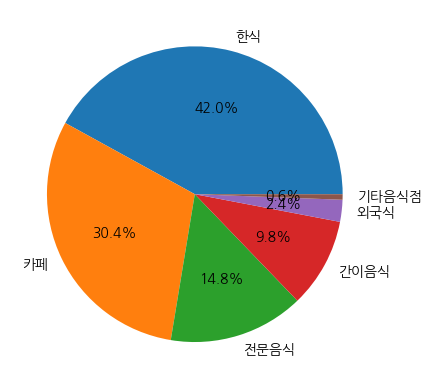

In [41]:
#예시 - pie차트?
#plt.pie(비율, label)

label = ('한식', '카페', '전문음식', '간이음식', '외국식', '기타음식점')
plt.pie(pie, labels=label, autopct='%.1f%%')    #원래 비율 입력해야 
plt.show()

#### 시각화 종류 

In [ ]:
#Line chart - 시간대별 변화, 시계열 데이터
#Bar chart - 두개 이상의 불연속 항목/ 양 비교시 
#Higtogram - 두개 이상의 불연속 항목/ 확률적 표현시
#Pie chart - 전체-부분 차지하는 정도 

## jeju_place 제주도 관광지 데이터

In [3]:
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 52.7 MB/s eta 0:00:00


In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [116]:
place = pd.read_excel('jeju_place.xlsx')
place.head()

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
0,1,제주국제공항,제주특별자치도,제주시,제주 제주시 공항로 2-0,기타관광,교통시설,803524
1,2,동문재래시장,제주특별자치도,제주시,제주 제주시 관덕로14길 20-0,쇼핑,시장,301089
2,3,서귀포매일올레시장,제주특별자치도,서귀포시,제주 서귀포시 중앙로62번길 18-0,쇼핑,시장,267930
3,4,함덕해수욕장,제주특별자치도,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477
4,5,성산일출봉,제주특별자치도,서귀포시,제주 서귀포시 일출로 284-12,자연관광,자연경관(산),195037


In [8]:
place.info()     #null값 없음 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   순위        500 non-null    int64 
 1   관광지명      500 non-null    object
 2   광역시/도     500 non-null    object
 3   시/군/구     500 non-null    object
 4   도로명주소     500 non-null    object
 5   중분류 카테고리  500 non-null    object
 6   소분류 카테고리  500 non-null    object
 7   검색건수      500 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [ ]:
place.describe()

In [117]:
#순위 > 인덱스로
place = place.set_index('순위')
place

,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
순위,,,,,,,
1,제주국제공항,제주특별자치도,제주시,제주 제주시 공항로 2-0,기타관광,교통시설,803524
2,동문재래시장,제주특별자치도,제주시,제주 제주시 관덕로14길 20-0,쇼핑,시장,301089
3,서귀포매일올레시장,제주특별자치도,서귀포시,제주 서귀포시 중앙로62번길 18-0,쇼핑,시장,267930
4,함덕해수욕장,제주특별자치도,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477
5,성산일출봉,제주특별자치도,서귀포시,제주 서귀포시 일출로 284-12,자연관광,자연경관(산),195037
...,...,...,...,...,...,...,...
495,퍼시픽마리나,제주특별자치도,서귀포시,제주 서귀포시 중문관광로 154-17,레저스포츠,수상레저스포츠,1913
497,쉬리의언덕,제주특별자치도,서귀포시,제주 서귀포시,기타관광,기타관광,1908
498,선운정사,제주특별자치도,제주시,제주 제주시 구몰동길 65-0,역사관광,종교성지,1902


In [11]:
#광역시/도에 제주도만 있는지 확인 > drop하려고 
place['광역시/도'].unique()

array(['제주특별자치도'], dtype=object)

In [118]:
place = place.drop('광역시/도', axis=1)
place

,관광지명,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
순위,,,,,,
1,제주국제공항,제주시,제주 제주시 공항로 2-0,기타관광,교통시설,803524
2,동문재래시장,제주시,제주 제주시 관덕로14길 20-0,쇼핑,시장,301089
3,서귀포매일올레시장,서귀포시,제주 서귀포시 중앙로62번길 18-0,쇼핑,시장,267930
4,함덕해수욕장,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477
5,성산일출봉,서귀포시,제주 서귀포시 일출로 284-12,자연관광,자연경관(산),195037
...,...,...,...,...,...,...
495,퍼시픽마리나,서귀포시,제주 서귀포시 중문관광로 154-17,레저스포츠,수상레저스포츠,1913
497,쉬리의언덕,서귀포시,제주 서귀포시,기타관광,기타관광,1908
498,선운정사,제주시,제주 제주시 구몰동길 65-0,역사관광,종교성지,1902


In [13]:
#중분류 카테고리도 확인 > 자를수 있는지 > 대신, 중분류 기준으로 데이터를 나눠볼 순 있겠다 생각! 
place['중분류 카테고리'].unique()

array(['기타관광', '쇼핑', '자연관광', '문화관광', '레저스포츠', '체험관광', '역사관광'],
      dtype=object)

In [14]:
#null값 다시 확인
place.isnull().sum()

관광지명        0
시/군/구       0
도로명주소       0
중분류 카테고리    0
소분류 카테고리    0
검색건수        0
dtype: int64

In [119]:
## 중분류로 데이터 나눠보기 
#우선 파악 
mid_cat = place['중분류 카테고리'].value_counts()      #제주도 관광지 검색 중 자연관광 영역이 가장 많이 검색됨
mid_cat

자연관광     138
문화관광     137
기타관광      94
레저스포츠     79
쇼핑        31
역사관광      14
체험관광       7
Name: 중분류 카테고리, dtype: int64

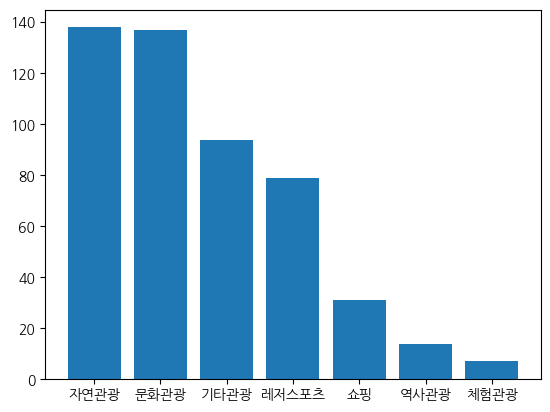

In [19]:
#그래프로 그려봄 - 연속되지 않은 거 양 > Bar-chart
#plt.bar(x,y)
plt.bar(mid_cat.index, mid_cat)
plt.show()

In [120]:
## 소분류 카테고리로 나눠보기 
low_cat = place['소분류 카테고리'].value_counts()
low_cat

자연경관(하천/해양)    79
기타관광           61
육상레저스포츠        50
전시시설           43
자연경관(산)        38
테마공원           29
도시공원           27
시장             18
데이트코스          18
기타레저스포츠        16
교통시설           15
수상레저스포츠        13
복합관광시설         13
공연시설           12
자연공원           11
역사유적지           9
대형마트            9
기타문화관광지         8
자연관광(산)         8
농/산/어촌체험        6
종교성지            5
면세점             3
랜드마크관광          3
자연생태            2
레저스포츠시설         2
웰니스관광           1
쇼핑몰             1
Name: 소분류 카테고리, dtype: int64

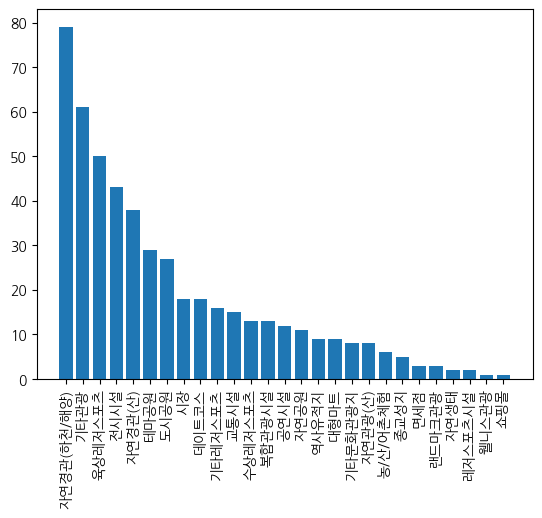

In [24]:
#마찬가지로 Barchart
plt.bar(low_cat.index, low_cat)
plt.xticks(rotation=90)             ##글자 가로로 겹칠때
plt.show()

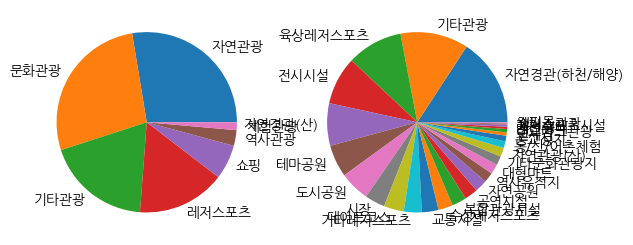

In [28]:
#전체-부분은 Pie-chart로 봄

plt.subplot(1,2,1)
#중분류
plt.pie(mid_cat, labels=mid_cat.index)

plt.subplot(1,2,2)
#소분류 
plt.pie(low_cat, labels=low_cat.index)
plt.show()

In [30]:
# 소분류 카테고리 -> 종류 너무 많으니까 -> 상위10개 값만 이용
#low_cat.head(10)   #or
low_cat[:10]        #0-9 10개

자연경관(하천/해양)    79
기타관광           61
육상레저스포츠        50
전시시설           43
자연경관(산)        38
테마공원           29
도시공원           27
시장             18
데이트코스          18
기타레저스포츠        16
Name: 소분류 카테고리, dtype: int64

In [121]:
#place dataframe에서까지 소분류 상위 10개 값 가져오기
#place['소분류 카테고리'].head(10)    #이건 소분류 카테고리 '상위'10개가 아님 그냥 순서중에서 10개임 

#top_low값 기준 -> 원래 데이터에서 해당하는 소분류 카테고리 뽑아오기 
place[place["소분류 카테고리"].isin(place["소분류 카테고리"].value_counts()[:10].index)]  #나요님 코드 

,관광지명,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
순위,,,,,,
2,동문재래시장,제주시,제주 제주시 관덕로14길 20-0,쇼핑,시장,301089
3,서귀포매일올레시장,서귀포시,제주 서귀포시 중앙로62번길 18-0,쇼핑,시장,267930
4,함덕해수욕장,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477
5,성산일출봉,서귀포시,제주 서귀포시 일출로 284-12,자연관광,자연경관(산),195037
6,협재해수욕장,제주시,제주 제주시,자연관광,자연경관(하천/해양),186252
...,...,...,...,...,...,...
491,새미은총의동산,제주시,제주 제주시,문화관광,도시공원,1936
492,금능해안도로,제주시,제주 제주시,기타관광,데이트코스,1923
495,조천만세동산,제주시,제주 제주시,문화관광,도시공원,1913


In [ ]:
place['소분류 카테고리'].value_counts().head(10)   #원래 데이터에서 가져온 값이 아니라 새롭게 정렬해준것 
                                                   #그래서 데이터프레임의 조건이 될 수 없음 

In [ ]:
# 자연경관 
nature = place[place['소분류 카테고리'] == '자연경관(하천/해양)']
nature

In [82]:
#자연경관에 대한 검색건수 
nature['검색건수'].sum()

1742995

In [85]:
nature['관광지명'].unique()     #전부 바다를 나타냄    #자연경관 > 바다정보인 것 알수있

array(['함덕해수욕장', '협재해수욕장', '이호테우해변', '곽지해수욕장', '김녕해수욕장', '금능해수욕장',
       '중문색달해변', '월정리해변', '표선해수욕장', '성산항', '광치기해변', '사계해수욕장', '세화해수욕장',
       '운진항', '판포포구', '모슬포항', '제주항제6부두', '삼양해수욕장', '제주항제4부두', '애월항',
       '황우지해안', '화순금모래해변', '법환포구', '한담해변', '하우목동항', '한림항', '홍조단괴해빈',
       '논짓물', '검멀레해수욕장', '도두항', '천진항', '구엄리돌염전', '서귀포항', '위미항', '하도해수욕장',
       '평대리해수욕장', '신양섭지해수욕장', '코난비치', '비양도', '오조포구', '제주항제2부두', '제주항제3부두',
       '보목포구', '신창풍차해안', '가파도', '화순항', '하고수동해수욕장', '대평포구', '사계항', '차귀도',
       '신도포구', '강정포구', '코난해변', '용수리포구', '제주항제9부두', '월령포구', '자구내포구',
       '구엄포구', '종달리해변', '제주항제7부두', '하모해수욕장', '세기알해변', '고내포구', '차귀도포구',
       '쇠소깍해변', '월평포구', '대포포구', '남원포구', '신흥해수욕장', '영락리방파제', '용담포구',
       '소금막해변', '수산저수지', '신창항', '하효항', '구두미포구', '제주항', '김녕포구', '동일리포구'],
      dtype=object)

### .drop으로 관점기준만 남기기

In [131]:
#관광지 초점으로 > 항구, 포구, 염전, 부두, 저수지 .. 제외 > 해수욕장만 한번 남겨보기 
nature = nature.drop(labels=nature[nature['관광지명'].str[-1] == '항'].index, axis=0) 

In [130]:
nature[nature['관광지명'].str[-1] == '항'].index

Int64Index([39, 62, 67, 96, 127, 141, 157, 164, 186, 195, 262, 279, 453, 455,
            483],
           dtype='int64', name='순위')

In [87]:
nature['관광지명'].unique()  #항 지워짐 

array(['함덕해수욕장', '협재해수욕장', '이호테우해변', '곽지해수욕장', '김녕해수욕장', '금능해수욕장',
       '중문색달해변', '월정리해변', '표선해수욕장', '광치기해변', '사계해수욕장', '세화해수욕장', '판포포구',
       '제주항제6부두', '삼양해수욕장', '제주항제4부두', '황우지해안', '화순금모래해변', '법환포구', '한담해변',
       '홍조단괴해빈', '논짓물', '검멀레해수욕장', '구엄리돌염전', '하도해수욕장', '평대리해수욕장',
       '신양섭지해수욕장', '코난비치', '비양도', '오조포구', '제주항제2부두', '제주항제3부두', '보목포구',
       '신창풍차해안', '가파도', '하고수동해수욕장', '대평포구', '차귀도', '신도포구', '강정포구', '코난해변',
       '용수리포구', '제주항제9부두', '월령포구', '자구내포구', '구엄포구', '종달리해변', '제주항제7부두',
       '하모해수욕장', '세기알해변', '고내포구', '차귀도포구', '쇠소깍해변', '월평포구', '대포포구',
       '남원포구', '신흥해수욕장', '영락리방파제', '용담포구', '소금막해변', '수산저수지', '구두미포구',
       '김녕포구', '동일리포구'], dtype=object)

In [132]:
nature = nature.drop(labels=nature[nature['관광지명'].str[-2:] == '포구'].index, axis=0)  #뒤에서부터 두글자

In [133]:
#부두, 염전, 저수지, 방파제 삭제
nature = nature.drop(labels=nature[nature['관광지명'].str[-2:] == '부두'].index, axis=0) 
nature = nature.drop(labels=nature[nature['관광지명'].str[-2:] == '염전'].index, axis=0) 
nature = nature.drop(labels=nature[nature['관광지명'].str[-3:] == '저수지'].index, axis=0) 
nature = nature.drop(labels=nature[nature['관광지명'].str[-3:] == '방파제'].index, axis=0) 

In [95]:
nature['관광지명'].unique()

array(['함덕해수욕장', '협재해수욕장', '이호테우해변', '곽지해수욕장', '김녕해수욕장', '금능해수욕장',
       '중문색달해변', '월정리해변', '표선해수욕장', '광치기해변', '사계해수욕장', '세화해수욕장', '삼양해수욕장',
       '황우지해안', '화순금모래해변', '한담해변', '홍조단괴해빈', '논짓물', '검멀레해수욕장', '하도해수욕장',
       '평대리해수욕장', '신양섭지해수욕장', '코난비치', '비양도', '신창풍차해안', '가파도', '하고수동해수욕장',
       '차귀도', '코난해변', '종달리해변', '하모해수욕장', '세기알해변', '쇠소깍해변', '신흥해수욕장',
       '소금막해변'], dtype=object)

In [96]:
nature  #해수욕장 관련만 있는 dataframe 얻게됨 

,관광지명,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
순위,,,,,,
4,함덕해수욕장,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477
6,협재해수욕장,제주시,제주 제주시,자연관광,자연경관(하천/해양),186252
7,이호테우해변,제주시,제주 제주시,자연관광,자연경관(하천/해양),134970
10,곽지해수욕장,제주시,제주 제주시,자연관광,자연경관(하천/해양),111702
22,김녕해수욕장,제주시,제주 제주시 해맞이해안로 7-6,자연관광,자연경관(하천/해양),78488
23,금능해수욕장,제주시,제주 제주시 금능길 119-10,자연관광,자연경관(하천/해양),77609
29,중문색달해변,서귀포시,제주 서귀포시 중문관광로72번길 0-0,자연관광,자연경관(하천/해양),61889
32,월정리해변,제주시,제주 제주시,자연관광,자연경관(하천/해양),58431
33,표선해수욕장,서귀포시,제주 서귀포시,자연관광,자연경관(하천/해양),56866


In [97]:
#정리된 바다 데이터의 기초통계 확인 
nature.describe()

,검색건수
count,35.000000
mean,37293.314286
std,50415.449007
min,2751.000000
25%,6737.000000
50%,13206.000000
75%,53093.000000
max,195477.000000


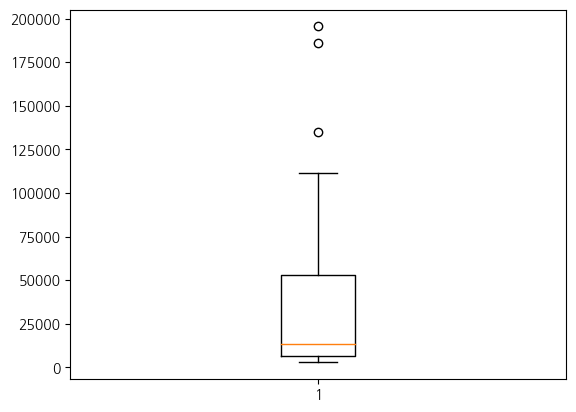

In [99]:
#q1,q2,q3 * 1.5 초과하면 -> 이상치 :검색량이 너무 많다 -> 혼잡도 높을 것 예상 
#검색건수 boxplot
plt.boxplot(nature['검색건수'])
plt.show()

In [134]:
#상위경계값 먼저 찾
#         = q3 + (q3-q1)*1.5
upper_iqr = 53093+ (53093-6737)*1.5
upper_iqr

122627.0

In [ ]:
#상위 경계값 초과하는 값 찾
import numpy as np 

#numpy에서 조건찾는 -where(조건, 참,거짓)
nature['혼잡도'] = np.where(nature['검색건수'] >= upper_iqr, '혼잡', '보통')
nature

In [ ]:
nature = nature.drop(labels=nature[nature['혼잡도'] == '혼잡'].index, axis=0)      #할당까지
nature

In [138]:
nature[nature['혼잡도'] == '혼잡'].index

Int64Index([4, 6, 7], dtype='int64', name='순위')

In [115]:
## 제주시, 서귀포시 바다로 나눠보면 -> 기준은 있지만 수치(평균,합계)는 원하지 않 -> 따라서 groupby 쓸필요없
#얼만큼 있는지 단순히 나누고 싶은거 
j = nature[nature['시/군/구'] == '제주시']
j.describe()
j.head()

,관광지명,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수,혼잡도
순위,,,,,,,
4,함덕해수욕장,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477,혼잡
6,협재해수욕장,제주시,제주 제주시,자연관광,자연경관(하천/해양),186252,혼잡
7,이호테우해변,제주시,제주 제주시,자연관광,자연경관(하천/해양),134970,혼잡
10,곽지해수욕장,제주시,제주 제주시,자연관광,자연경관(하천/해양),111702,보통
22,김녕해수욕장,제주시,제주 제주시 해맞이해안로 7-6,자연관광,자연경관(하천/해양),78488,보통


In [116]:
s = nature[nature['시/군/구'] == '서귀포시']
s.describe()
s.head()

,관광지명,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수,혼잡도
순위,,,,,,,
29,중문색달해변,서귀포시,제주 서귀포시 중문관광로72번길 0-0,자연관광,자연경관(하천/해양),61889,보통
33,표선해수욕장,서귀포시,제주 서귀포시,자연관광,자연경관(하천/해양),56866,보통
40,광치기해변,서귀포시,제주 서귀포시,자연관광,자연경관(하천/해양),49320,보통
43,사계해수욕장,서귀포시,제주 서귀포시,자연관광,자연경관(하천/해양),48751,보통
105,황우지해안,서귀포시,제주 서귀포시,자연관광,자연경관(하천/해양),17177,보통


In [141]:
#검색건수로 시각화해보면 - groupby
#기준별 얼마큼 있는지 - gorupby 이용    #숫자 비교하고 싶을때 
groupby_city = nature.groupby('시/군/구')['검색건수'].sum()
groupby_city

시/군/구
서귀포시    289143
제주시     499424
Name: 검색건수, dtype: int64

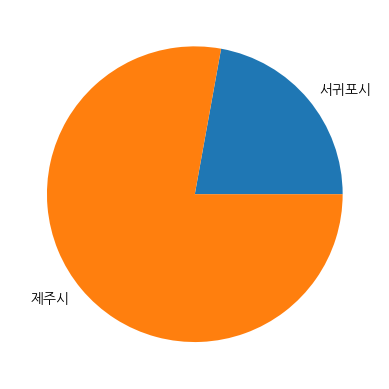

In [118]:
#nature (바다)검색수 안에서 제주시, 서귀포시가 어느정도 검색량을 차지하고 있는지 - Piechart
labels = ('서귀포시', '제주시')

plt.pie(groupby_city, labels=labels)
plt.show()

## region 코로나 지역별 데이터

In [1]:
import pandas as pd

region = pd.read_csv('region.csv')
region.head()
region.tail()

,day,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,검역,총확진자수
27,2020-03-28,390,114,6587,51,20,31,39,44,433,32,41,126,10,8,1285,91,8,168,9478
28,2020-03-29,410,117,6610,58,20,34,39,46,448,34,41,127,12,9,1287,94,8,189,9583
29,2020-03-30,426,118,6624,58,20,34,39,46,463,36,44,127,13,9,1298,95,9,202,9661
30,2020-03-31,450,119,6684,64,20,36,39,46,476,36,44,128,13,9,1300,96,9,217,9786
31,2020-04-01,474,122,6704,69,24,36,39,46,499,38,44,131,14,12,1302,100,9,224,9887


In [122]:
region.shape

(32, 20)

In [ ]:
#day를 index로
region = region.set_index('day')
region.head()

In [3]:
region.info()   #datetimeindex가 아니라 그냥 index 

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 2020-03-01 to 2020-04-01
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   서울      32 non-null     int64
 1   부산      32 non-null     int64
 2   대구      32 non-null     int64
 3   인천      32 non-null     int64
 4   광주      32 non-null     int64
 5   대전      32 non-null     int64
 6   울산      32 non-null     int64
 7   세종      32 non-null     int64
 8   경기      32 non-null     int64
 9   강원      32 non-null     int64
 10  충북      32 non-null     int64
 11  충남      32 non-null     int64
 12  전북      32 non-null     int64
 13  전남      32 non-null     int64
 14  경북      32 non-null     int64
 15  경남      32 non-null     int64
 16  제주      32 non-null     int64
 17  검역      32 non-null     int64
 18  총확진자수   32 non-null     int64
dtypes: int64(19)
memory usage: 5.0+ KB


In [6]:
region.index = pd.to_datetime(region.index, format = '%Y-%m-%d')
region.info()    #Datetimeindex로 바뀜 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 2020-03-01 to 2020-04-01
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   서울      32 non-null     int64
 1   부산      32 non-null     int64
 2   대구      32 non-null     int64
 3   인천      32 non-null     int64
 4   광주      32 non-null     int64
 5   대전      32 non-null     int64
 6   울산      32 non-null     int64
 7   세종      32 non-null     int64
 8   경기      32 non-null     int64
 9   강원      32 non-null     int64
 10  충북      32 non-null     int64
 11  충남      32 non-null     int64
 12  전북      32 non-null     int64
 13  전남      32 non-null     int64
 14  경북      32 non-null     int64
 15  경남      32 non-null     int64
 16  제주      32 non-null     int64
 17  검역      32 non-null     int64
 18  총확진자수   32 non-null     int64
dtypes: int64(19)
memory usage: 5.0 KB


In [7]:
#null값 다시 확인
region.isnull().sum()

서울       0
부산       0
대구       0
인천       0
광주       0
대전       0
울산       0
세종       0
경기       0
강원       0
충북       0
충남       0
전북       0
전남       0
경북       0
경남       0
제주       0
검역       0
총확진자수    0
dtype: int64

In [ ]:
region.describe()

In [ ]:
#전국 확진자수 
#원래 이렇게 접근 region.loc()
#하지만 컬럼별로 접근해야 하기때문에

region.iloc[0:2]                      #iloc :행 기준 뽑힘
region.loc[:, ['서울', '부산']]      #loc[행 인덱스, column] -> 특정 값 반환 
                                      #인덱스는 다 가져오고, columns 여러개

In [19]:
region.columns[:-1]

Index(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남',
       '전북', '전남', '경북', '경남', '제주', '검역'],
      dtype='object')

In [146]:
#loc(인덱스, 특정 칼럼) -> 특정 값 return 
cities = region.loc[:, region.columns[:-1]] 

In [ ]:
total = region.loc[:, '총확진자수']
total

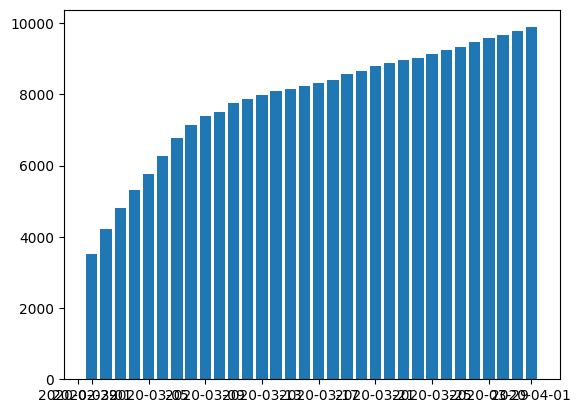

In [23]:
#확진자수라는 하나의 변수 > Bar-chart
import matplotlib.pyplot as plt

plt.bar(total.index, total)              #확진자수 증가 
plt.show()

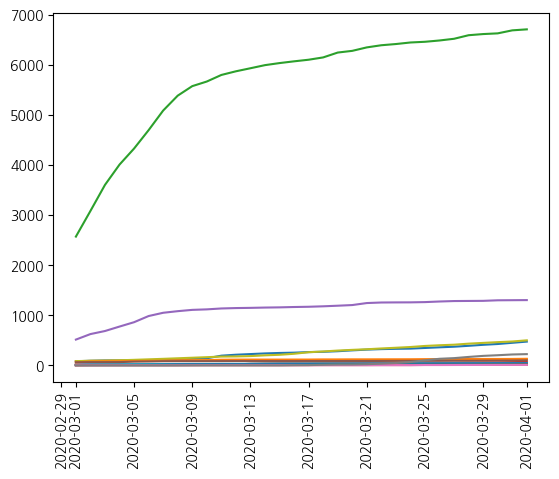

'\n그래프가 식별이 잘되지 않을때, \n그래프의 범위를 바꿔주거나 다른 그래프를 사용하는 방법이 있음 \n'

In [147]:
#지역별 그래프 그려본다면 > 여러경향 비교 -  Linechart 

#지역만 다르고(y), index는 동일 (x)
plt.plot(cities)
plt.xticks(rotation=90)
plt.show()
'''
그래프가 식별이 잘되지 않을때, 
그래프의 범위를 바꿔주거나 다른 그래프를 사용하는 방법이 있음 
'''

In [37]:
import koreanize_matplotlib

In [ ]:
#누적그래프  -pass 
#plt.stackplot(x, y1, y2, y3 , ..., labels=)
#colors = ('orange', 'green')


In [45]:
## 확진자 제주 지역으로 특정 
jeju = region['제주']   #시리즈 형태

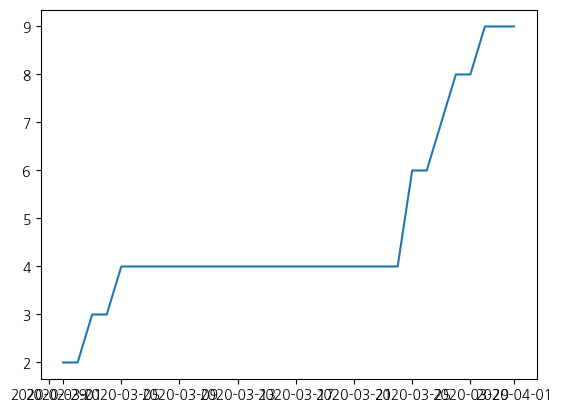

In [46]:
#간단하게 시간대별 - Linechart
plt.plot(jeju)
plt.show()

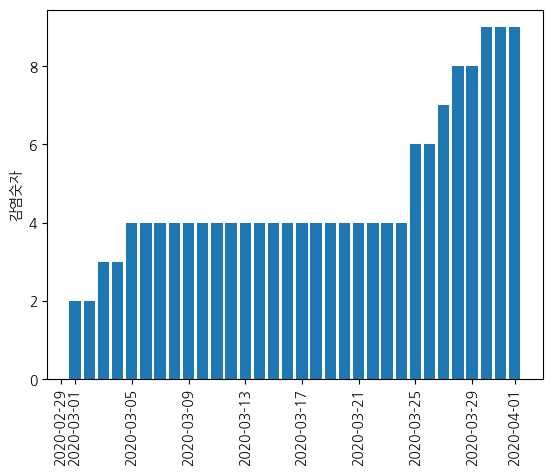

In [148]:
#데이터 시각화로 > 어떤 구간에 (큰)변화가 있는지 > 추가적으로 그 구간 검색해보기 

plt.bar(jeju.index, jeju)
plt.ylabel('감염숫자')
plt.xticks(rotation=90)
plt.show()                                          
#변화 폭을 민감하게 살펴봐야 

#인사이트 도출할때 
# 마스크 해지 시점: 3월 -> 이후에 감염 증감 체크해볼 수도 
# 예시, 마스크 해지 이후 코로나는 변화 없/ 폐렴, 독감이 증가했다면? 

In [150]:
## 코로나 지역별 데이터니까
#지역명으로 -> 실제 좌표의 위치 알아보기
#좌표 데이터  > 시청, 도청  > 위도, 경도 
loc = {
  '서울' : [37.566418, 126.977950],#서울시청
  '부산' : [35.180152, 129.074980],#부산시청
  '대구' : [35.871468, 128.601757],#대구시청
  '인천' : [37.456445, 126.705873],#인천시청
  '광주' : [35.160068, 126.851426],#광주광역시청
  '대전' : [36.350664, 127.384819],#대전시청
  '울산' : [35.539772, 129.311486],#울산시청
  '세종' : [36.480838, 127.289181],#세종시청
  '경기' : [37.275221, 127.009382],#경기도청
  '강원' : [37.885300, 127.729835],#강원(강원도청)
  '충북' : [36.635947, 127.491345],#충북도청
  '충남' : [36.658826, 126.672849],#충남도청
  '전북' : [35.820599, 127.108759],#전북도청
  '전남' : [34.816351, 126.462924],#전남도청
  '경북' : [36.574108, 128.509303],#경북도청
  '경남' : [35.238398, 128.692371],#경남도청
  '제주' : [33.3617007, 126.511657]#제주
    }
type(loc)

dict

In [ ]:
pd.DataFrame(loc)

In [152]:
loc = pd.DataFrame(loc).T    #.T 전치행렬
loc.columns = ('lat', 'lon')   #> column2개로 바꿔줌 
loc

,lat,lon
서울,37.566418,126.977950
부산,35.180152,129.074980
대구,35.871468,128.601757
인천,37.456445,126.705873
광주,35.160068,126.851426
대전,36.350664,127.384819
울산,35.539772,129.311486
세종,36.480838,127.289181
경기,37.275221,127.009382
강원,37.885300,127.729835


### 지도 관련 라이브러리 - folium

In [55]:
#지도 관련 라이브러리 설치
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
import folium

In [57]:
#원하는 지도 출력 - folium.Map(location=[위도, 경도])  
map_osn = folium.Map(location=[33.361701, 126.511657])   #제주도 위치 
map_osn  

In [62]:
#지도 위에 해당하는 지역의 확진자수를 표시
from folium.plugins import MarkerCluster

#map_osn에서 MarkerCluster를 사용하겠다 선언
marker_cluster = MarkerCluster().add_to(map_osn)   

#어떤 위치의 Marker를 입력할 것인지 
#folium.Marker([위도, 경도], popup=, icon=folium.Icon(colo='red', icon='start')).add_to(marker_cluster)   
folium.Marker([33.361701, 126.511657], popup=[33.361701, 126.511657], icon=folium.Icon(color='red', icon='star')).add_to(marker_cluster)

map_osn

### annotation 기능
* plot 위에 표시할 수 있음 

In [ ]:
import matplotlib.dates as mdates
# 위에서 모듈 임포트 이후에 x값(인덱스값)을 mdates.date2num 함수를 이용해서 숫자로 바꿔주면
# annotation 기능을 사용할 수 있습니다.
# 데이터 시각화 -> 어떤 구간에 (큰)변화가 있는지

plt.annotate('변화', xy=(mdates.date2num(jeju.index[24]), 6), xytext=(mdates.date2num(jeju.index[15]), 6), arrowprops={'color':'green'})

## total 코로나 한국전체 데이터

In [64]:
kr = pd.read_csv('total_.csv')
kr.head()
kr.tail()

,date,총계,확진자,격리해제,격리중,사망,검사중,결과 음성
27,2020-03-28,387925,9478,4811,4523,144,16564,361883
28,2020-03-29,394141,9583,5033,4398,152,15028,369530
29,2020-03-30,395194,9661,5228,4275,158,13531,372002
30,2020-03-31,410564,9786,5408,4216,162,16892,383886
31,2020-04-01,421547,9887,5567,4155,165,16585,395075


In [65]:
kr = kr.set_index('date')
kr.head()

,총계,확진자,격리해제,격리중,사망,검사중,결과 음성
date,,,,,,,
2020-03-01,96985,3526,30,3479,17,32422,61037
2020-03-02,109591,4212,31,4159,22,33799,71580
2020-03-03,125851,4812,34,4750,28,35555,85484
2020-03-04,136707,5328,41,5255,32,28414,102965
2020-03-05,146541,5766,88,5643,35,21810,118965


In [66]:
kr.info()   #역시 바꿔줘야 

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 2020-03-01 to 2020-04-01
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   총계      32 non-null     int64
 1   확진자     32 non-null     int64
 2   격리해제    32 non-null     int64
 3   격리중     32 non-null     int64
 4   사망      32 non-null     int64
 5   검사중     32 non-null     int64
 6   결과 음성   32 non-null     int64
dtypes: int64(7)
memory usage: 2.0+ KB


In [69]:
kr.index = pd.to_datetime(kr.index, format='%Y-%m-%d')
kr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 2020-03-01 to 2020-04-01
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   총계      32 non-null     int64
 1   확진자     32 non-null     int64
 2   격리해제    32 non-null     int64
 3   격리중     32 non-null     int64
 4   사망      32 non-null     int64
 5   검사중     32 non-null     int64
 6   결과 음성   32 non-null     int64
dtypes: int64(7)
memory usage: 2.0 KB


In [ ]:
kr.describe()

In [70]:
kr.isnull().sum()

총계       0
확진자      0
격리해제     0
격리중      0
사망       0
검사중      0
결과 음성    0
dtype: int64

In [71]:
kr.head()

,총계,확진자,격리해제,격리중,사망,검사중,결과 음성
date,,,,,,,
2020-03-01,96985,3526,30,3479,17,32422,61037
2020-03-02,109591,4212,31,4159,22,33799,71580
2020-03-03,125851,4812,34,4750,28,35555,85484
2020-03-04,136707,5328,41,5255,32,28414,102965
2020-03-05,146541,5766,88,5643,35,21810,118965


### 칼럼끼리 상관성, 반대경향 비교

In [74]:
## 데이터중 컬럼들이 서로 상관성, 반대경향이 있으면 서로 비교해야 - 상관관계, 상관계수.. 
pos = kr['확진자']
neg = kr['결과 음성']

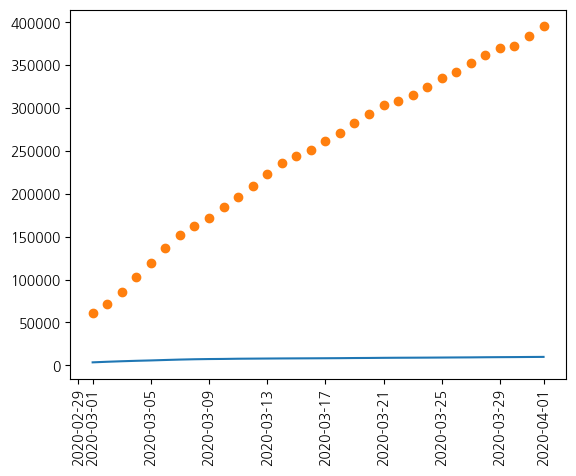

In [76]:
#시각적 비교 
plt.plot(pos)
plt.plot(neg, 'o')
plt.xticks(rotation=90)
plt.show()

### 두 칼럼 합쳐서 하나의 결과 도출 

In [ ]:
## 두 데이터(컬럼) 합쳐서 하나의 결과를 도출 
#확진자 중 사망 비율 -> 사망률 알 수 있
pos
death = kr['사망']

death_ratio = round(death/pos * 100, 2)   #소수점 2자리까지 자름
death_ratio

In [96]:
#확진자 중 격리해제 비율 -> 완치율 알 수 있
pos
recover = kr['격리해제']

recover_ratio = round(recover/pos * 100, 2)

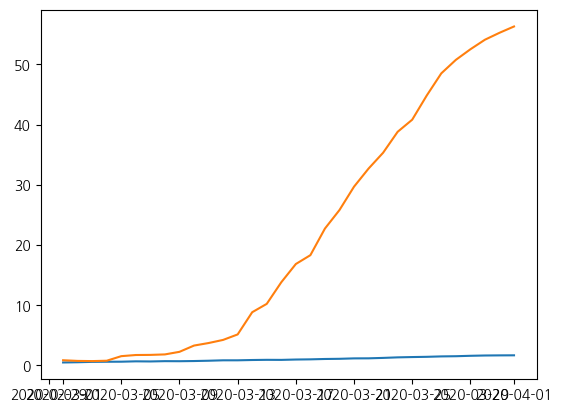

In [97]:
##사망률-완치율 비교 가능
#또한 이건 3월 데이터인데,  4월데이터, ... 등과 비교하여 데이터 흐름도 파악할 수 있음 

plt.plot(death_ratio)
plt.plot(recover_ratio)     #완치율은 굉장히 빠르게(유의미하게) 증가 
plt.show()

In [ ]:
##양성, 음성 반대되는 데이터 비교 -> Bar 그래프?
#x : 비교할 데이터를 넣고 

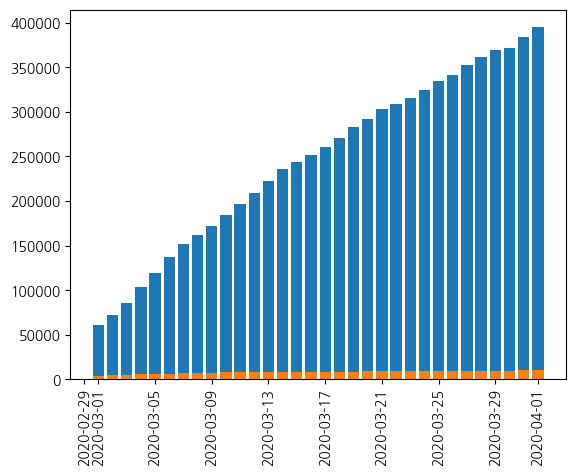

In [89]:
plt.xticks(rotation=90)
plt.bar(neg.index, neg)
plt.bar(pos.index, pos)

plt.show()

In [91]:
#데이터 범위 차이가 너무 큼

#따라서 아래가 좋은 방법 - 합계나 평균으로 작업해서 두개만 비교하도록 
#양성(총합), 음성(총합)
sum_p = pos.sum()
sum_p

252561

In [92]:
sum_n = neg.sum()
sum_n

7873877

<BarContainer object of 1 artists>

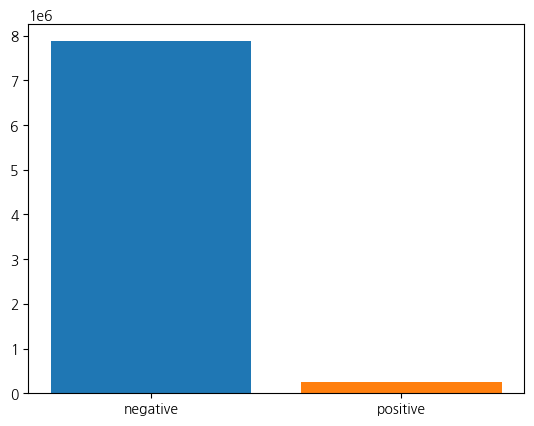

In [93]:
plt.bar('negative', sum_n)
plt.bar('positive', sum_p)

### 경향 비교

In [99]:
#사망자수, 치명률
death.head()
death_ratio.head()

date
2020-03-01    0.48
2020-03-02    0.52
2020-03-03    0.58
2020-03-04    0.60
2020-03-05    0.61
dtype: float64

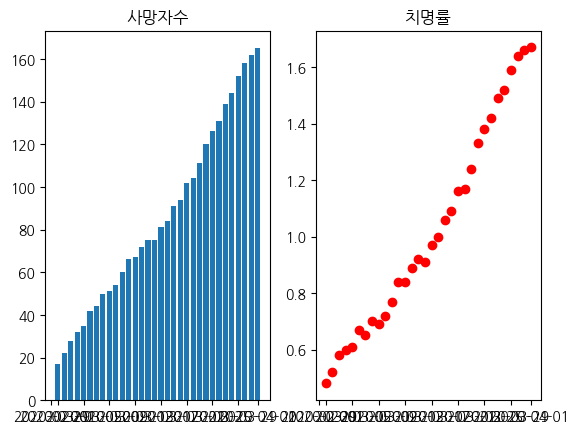

In [103]:
plt.subplot(1,2,1)
plt.bar(death.index, death)
plt.title('사망자수')

plt.subplot(1,2,2)
plt.plot(death_ratio, 'or')
plt.title('치명률')
plt.show()

#내가 새롭게 만든 데이터가 원래 데이터와 같은 경향인지 확인해야! 
#같은 경향 > 제대로 된 변환했다 뜻 

In [ ]:
#전체-부분 
#어떤 값이 전체에서 어느정도 차지하고 있느냐

#시계열 - 변화, 흐름 
#1. 경향성 -> 크게 변하는 시점(상승, 하강, 반복)
#2. 비율 -> 시간의 흐름에 따라 특정한 부분이 얼마나 영향을 끼치고 있는지: 흐름, 변화

#확진자 중 사망자(얼마나), 완치자(얼마나)
#일별 

#격리중, 격리해제 비율
#검사 중 양성,음성 비율
#주말 전후 양성 비율 변화 
#주말 전후 검사량 변화

In [107]:
# 확진자 중 사망자(얼마나), 완치자(얼마나): 일별

print(death.head())     # '사망'
print(recover.head())   # '격리해제'

date
2020-03-01    17
2020-03-02    22
2020-03-03    28
2020-03-04    32
2020-03-05    35
Name: 사망, dtype: int64
date
2020-03-01    30
2020-03-02    31
2020-03-03    34
2020-03-04    41
2020-03-05    88
Name: 격리해제, dtype: int64


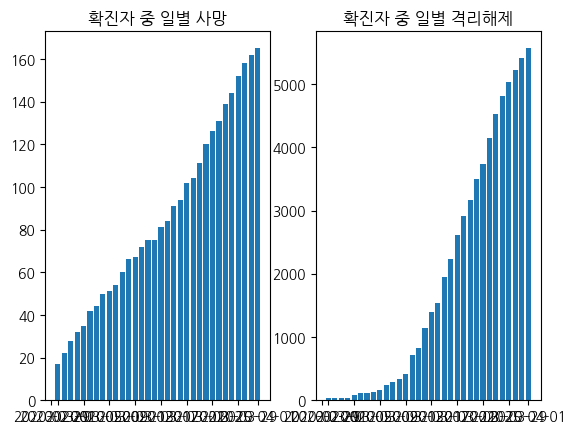

In [155]:
plt.subplot(1, 2, 1)
plt.bar(death.index, death)
plt.title('확진자 중 일별 사망')

plt.subplot(1, 2, 2)
plt.bar(recover.index, recover)
plt.title('확진자 중 일별 격리해제')

plt.show()

### 경향, 비율 비교 

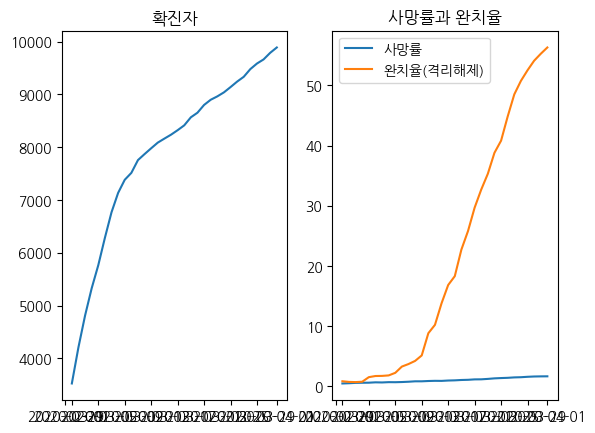

In [162]:
##치명률, 완치율
#확진자와 경향성 비교  
plt.subplot(1,2,1)
#plt.bar(pos.index, pos)   #확진자 꾸준히 증가하는 상승세
plt.plot(pos.index, pos)  #경향 더 잘보임 
plt.title('확진자')

plt.subplot(1,2,2)
plt.plot(death_ratio, label='사망률')             #사망, 격리해제도 증가 
plt.plot(recover_ratio, label='완치율(격리해제)') #다행히, 확진자에 대한 경향을 완치율(격리해제)이 따라가고 있음 
plt.title('사망률과 완치율')

plt.legend(loc='upper left')
plt.show()